In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [12]:
df = pd.read_csv("housing.csv")
# df = df.dropna()

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

np.any(np.isnan(df))

False

In [13]:
df.head()
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593   69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120   76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976   91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794   89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  999.0  2.5050    1  273   

     PTRATIO       B   LSTAT  MEDV  
0       15.3  396.90    4.98  24.0  
1  

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

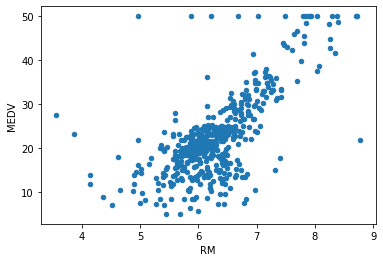

In [14]:
df.plot.scatter('RM', 'MEDV')

In [15]:
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

# print(type(x))
# print(type(y))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

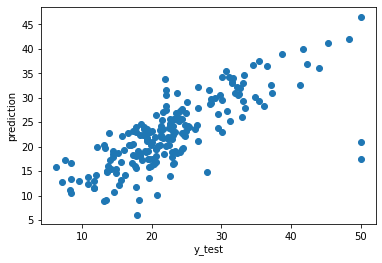

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [19]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.638558595383061
MSE: 27.467067540036343
RMSE: 5.240903313364629


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

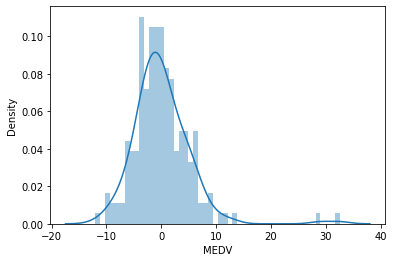

In [20]:
sns.distplot((y_test-predictions), bins = 50)

In [21]:
coefficients = pd.DataFrame(lm.coef_, x.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,0.000684
ZN,0.000586
INDUS,-0.000717
CHAS,0.001104
NOX,-30.897097
RM,6.527007
AGE,0.002730
DIS,-1.282745
RAD,0.221273
TAX,-0.011392
